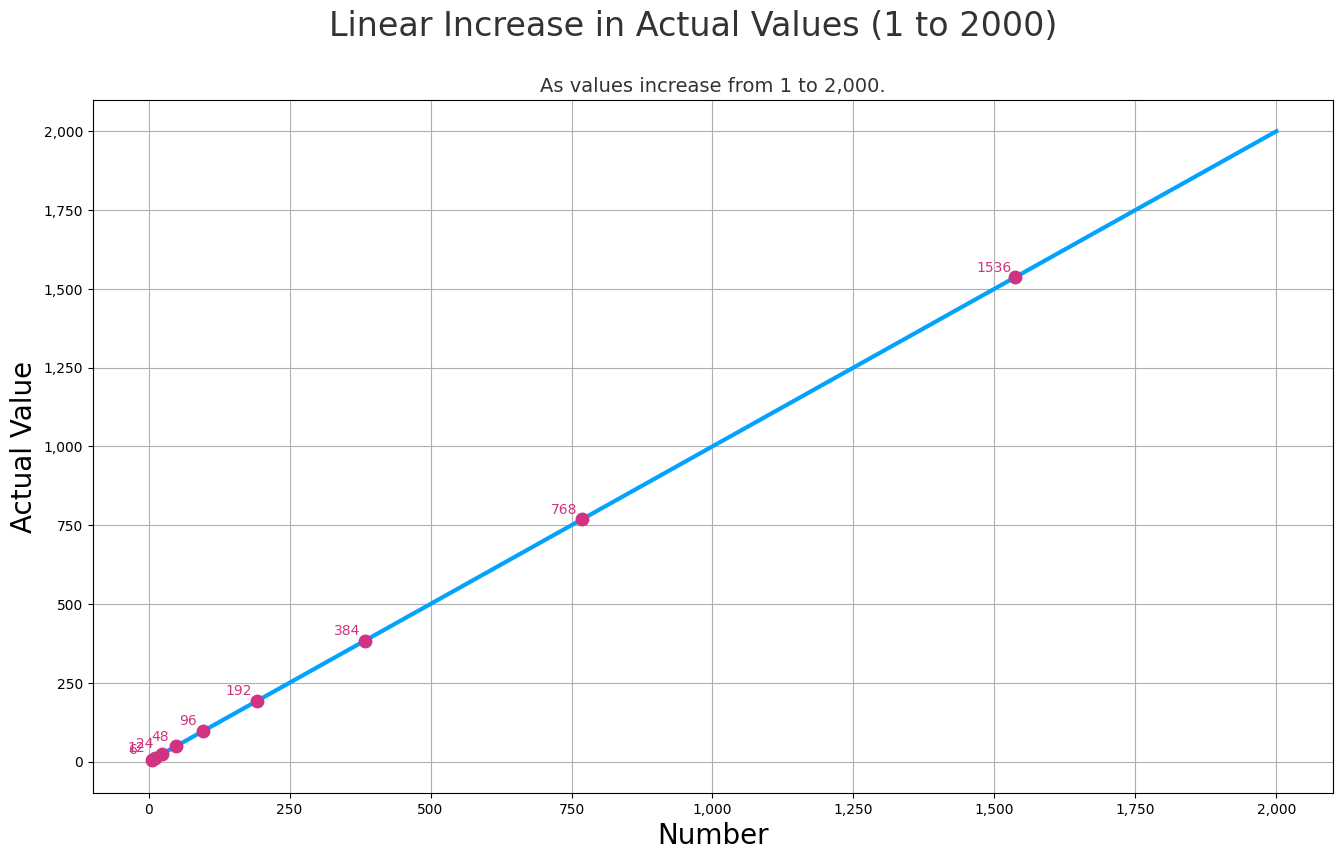

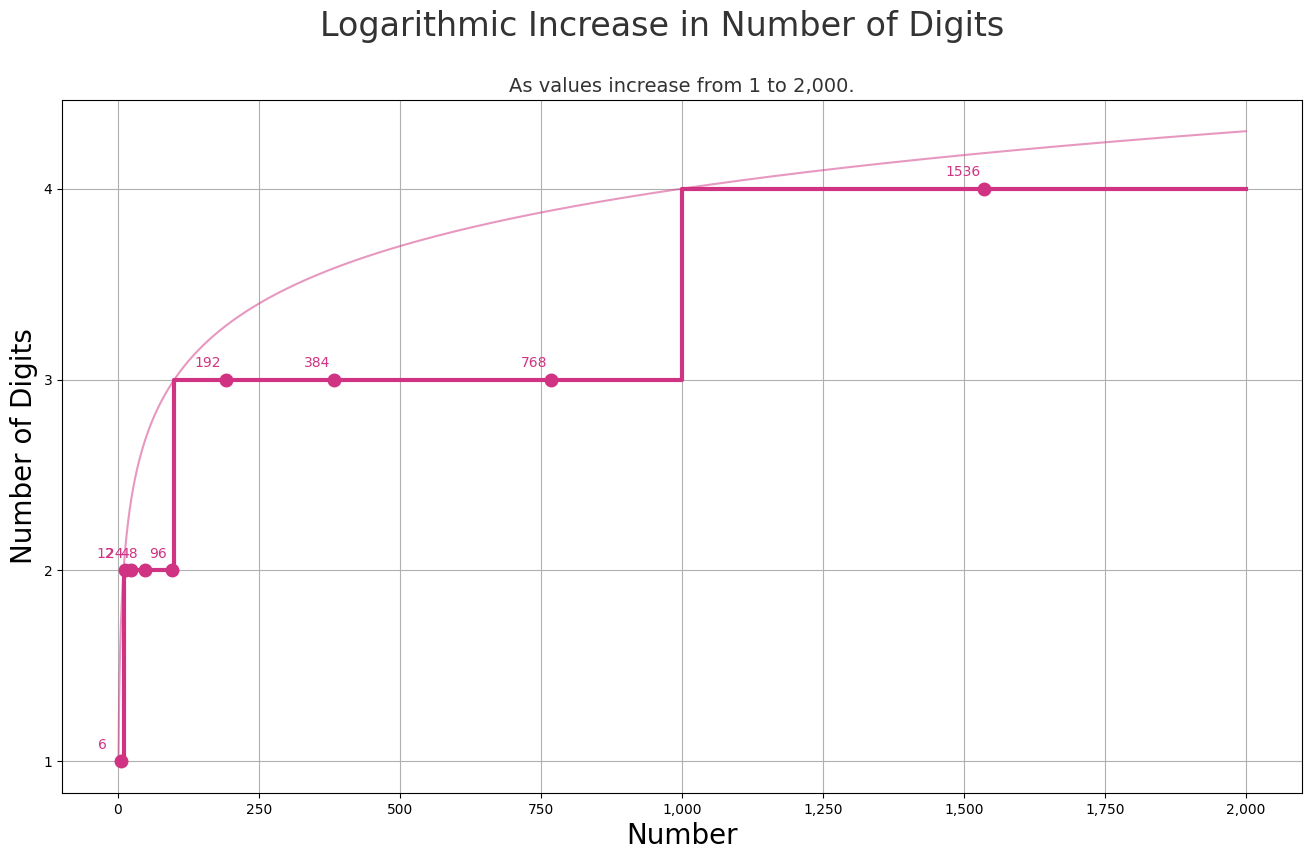

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib as mpl

# Set the color for all text to #333
mpl.rcParams['text.color'] = '#333'

# Function to format tick labels with commas
def comma_formatter(x, pos):
    return '{:,}'.format(int(x))

# Adjusting the range to go from 1 to 2000
linear_points_extended = np.array([1, 2000])
log_points_extended_to_limit = np.array([10**i for i in range(int(np.log10(2000)) + 1)])
log_points_extended_to_limit = np.append(log_points_extended_to_limit, 2000)  # Ensure 2000 is included

# Recalculate the number of digits
digit_counts_extended_to_limit = np.floor(np.log10(log_points_extended_to_limit)) + 1

rabbit_population = []
population = 6  # Initial population

while population <= 2000:
    rabbit_population.append(population)
    population *= 2  # Double the population for the next generation

# Sampled range for the continuous logarithmic function to manage memory usage
sampled_range = np.linspace(1, 2000, num=10000, endpoint=True)
log_function_sampled = np.log10(sampled_range) + 1

# Create the first plot (Linear Increase)
plt.figure(figsize=(16, 9))  # Set aspect ratio to 16:9 for the first plot

plt.plot(linear_points_extended, linear_points_extended, color=(0.012, 0.635, 0.996), linewidth=3)

# Plotting the rabbit population on the linear plot
plt.scatter(rabbit_population, rabbit_population, color=(0.815, 0.2, 0.51), s=9**2, zorder=3)

# Add labels to each rabbit population point on the linear plot with dynamic offset
for x in rabbit_population:
    offset = 80 / np.log10(x)
    plt.text(x - offset, x + 10, str(x), color=(0.815, 0.2, 0.51), fontsize=10, ha='right', va='bottom')

plt.suptitle('Linear Increase in Actual Values (1 to 2000)', fontsize=24)
plt.title('As values increase from 1 to 2,000.', fontsize=14)
plt.xlabel('Number', fontsize=20)
plt.ylabel('Actual Value', fontsize=20)
plt.grid(True)

# Apply comma formatting to X and Y tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

# Save the first plot as an image
linear_image_filename = 'linear_increase_plot.png'
plt.savefig(linear_image_filename)
plt.show()

# Create the second plot (Stepwise vs. Actual Logarithmic Increase)
plt.figure(figsize=(16, 9))  # Set aspect ratio to 16:9 for the second plot

# Calculating the number of digits for each rabbit population count
rabbit_population_digits = np.floor(np.log10(rabbit_population)) + 1

# Plotting the rabbit population on the logarithmic plot
plt.scatter(rabbit_population, rabbit_population_digits, color=(0.815, 0.2, 0.51), s=9**2, zorder=3)

# Add labels to each rabbit population point on the logarithmic plot with dynamic offset
for x, y in zip(rabbit_population, rabbit_population_digits):
    offset = 80 / np.log10(x)
    plt.text(x - offset, y + 0.05, str(x), color=(0.815, 0.2, 0.51), fontsize=10, ha='right', va='bottom')

plt.step(log_points_extended_to_limit, digit_counts_extended_to_limit, where='post', color=(0.815, 0.2, 0.51), linewidth=3)
plt.plot(sampled_range, log_function_sampled, color=(0.815, 0.2, 0.51), alpha=0.5, linewidth=1.5)
plt.suptitle('Logarithmic Increase in Number of Digits', fontsize=24)
plt.title('As values increase from 1 to 2,000.', fontsize=14)
plt.xlabel('Number', fontsize=20)
plt.ylabel('Number of Digits', fontsize=20)
plt.grid(True)

# Set y-ticks to whole numbers representing the number of digits
plt.yticks(np.arange(1, np.max(rabbit_population_digits) + 1, 1))

# Apply comma formatting to X and Y tick labels
plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_formatter))

# Save the second plot as an image
logarithmic_image_filename = 'logarithmic_increase_plot.png'
plt.savefig(logarithmic_image_filename)
plt.show()
